Importing libraries and loading datasets

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('Zoo.csv')

# Display the first few rows
print("Dataset Head:")
print(df.head())

# Display dataset info
print("\nDataset Info:")
df.info()

# Display descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

Dataset Head:
  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4   

1. Analyze the data using visualizations

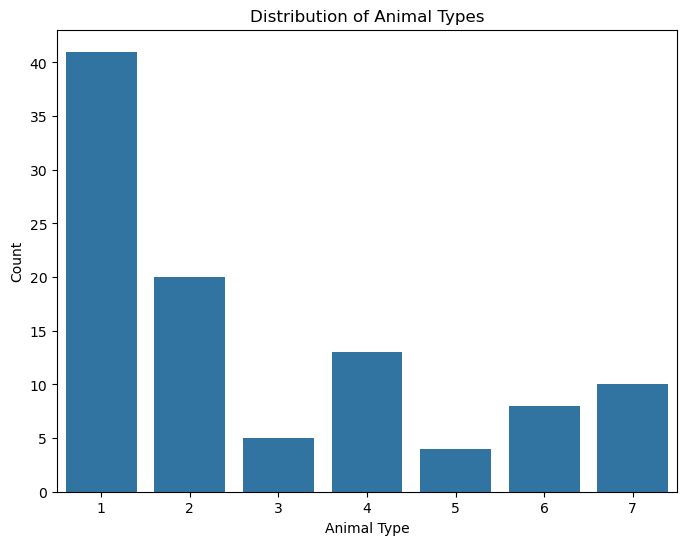

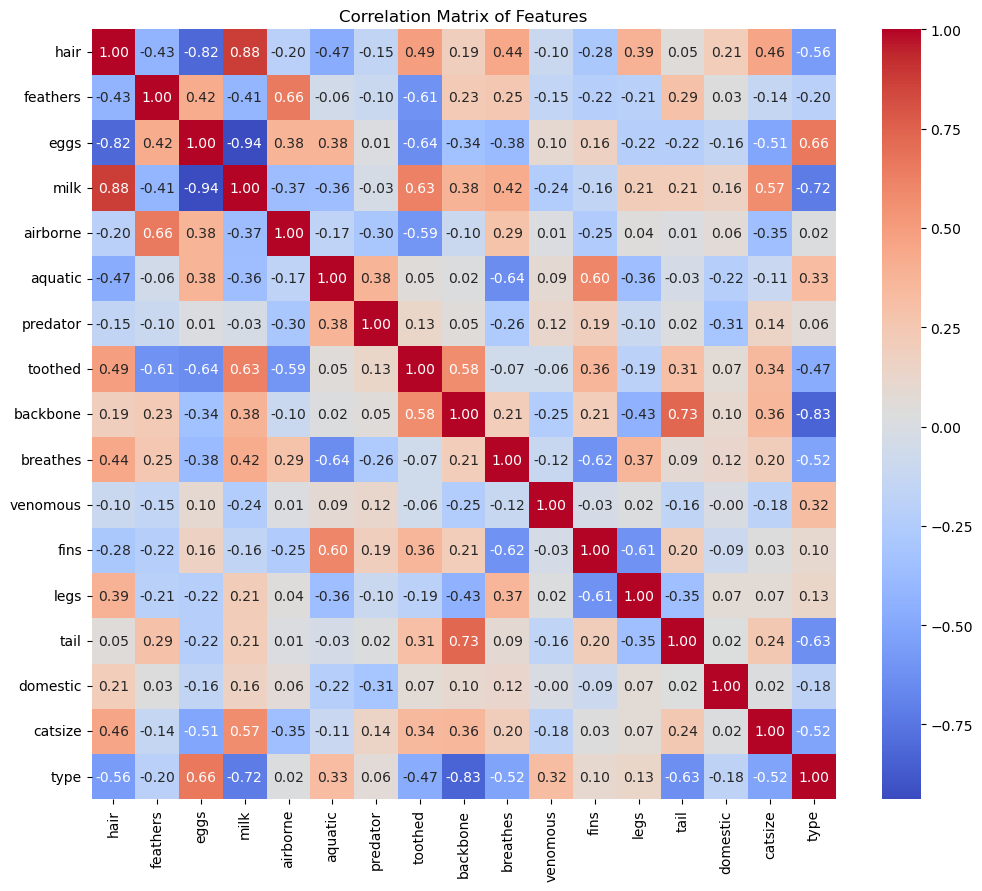

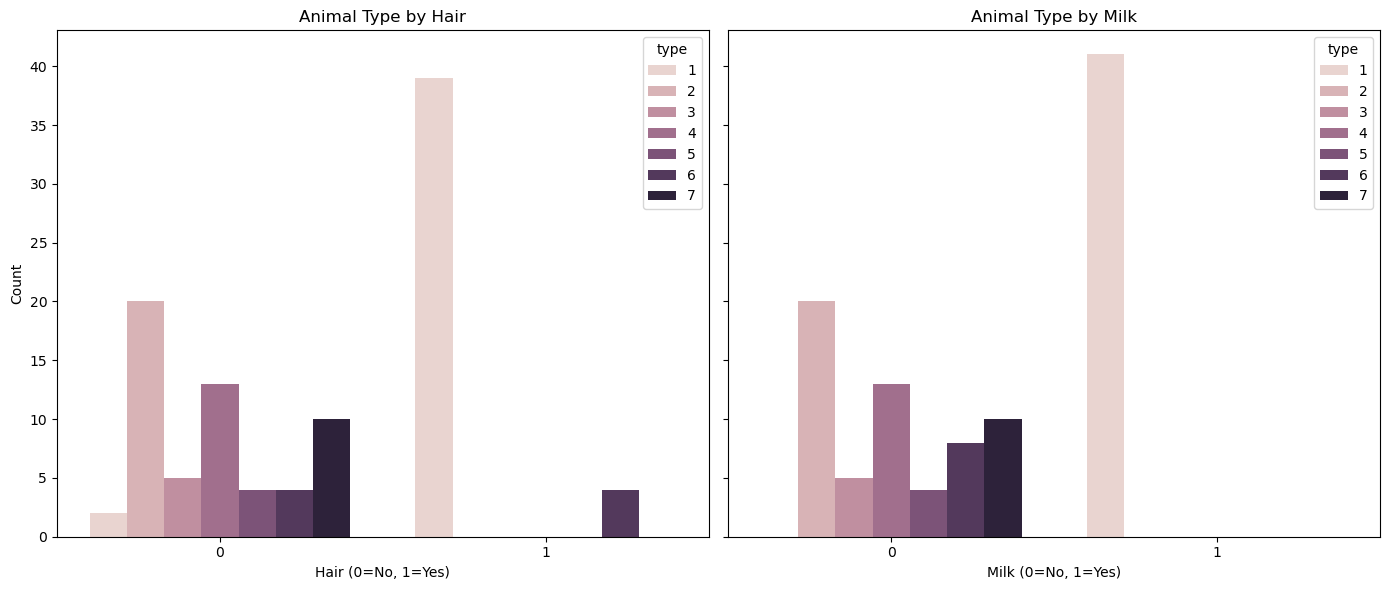

In [2]:
# Distribution of 'type'
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

# Drop 'animal name' for correlation analysis as it's a unique identifier
df_numeric = df.drop('animal name', axis=1)

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# Example: Relationship between 'hair', 'milk' and 'type'
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.countplot(x='hair', hue='type', data=df, ax=axes[0])
axes[0].set_title('Animal Type by Hair')
axes[0].set_xlabel('Hair (0=No, 1=Yes)')
axes[0].set_ylabel('Count')

sns.countplot(x='milk', hue='type', data=df, ax=axes[1])
axes[1].set_title('Animal Type by Milk')
axes[1].set_xlabel('Milk (0=No, 1=Yes)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()



2. Preprocess the data by handling missing values & Outliers, if any.

In [3]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


3. Split the dataset into training and testing sets (80% training, 20% testing).

In [4]:
# Separate features (X) and target (y)
X = df.drop(['animal name', 'type'], axis=1)
y = df['type']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")


Training set shape: (80, 16)
Testing set shape: (21, 16)
Training target shape: (80,)
Testing target shape: (21,)


In [5]:
    # Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better readability, if needed for further inspection
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nScaled Training Data Head:")
print(X_train_scaled_df.head())


Scaled Training Data Head:
       hair  feathers      eggs      milk  airborne   aquatic  predator  \
0 -0.837931      -0.5  0.859727 -0.837931 -0.538816 -0.733799  0.859727   
1 -0.837931      -0.5  0.859727 -0.837931 -0.538816 -0.733799 -1.163160   
2 -0.837931       2.0  0.859727 -0.837931  1.855921  1.362770  0.859727   
3 -0.837931      -0.5  0.859727 -0.837931 -0.538816  1.362770  0.859727   
4 -0.837931      -0.5  0.859727 -0.837931 -0.538816  1.362770  0.859727   

    toothed  backbone  breathes  venomous      fins      legs      tail  \
0 -1.224745 -2.171241      -2.0 -0.333333 -0.460566 -1.374155 -1.676163   
1 -1.224745  0.460566       0.5 -0.333333 -0.460566  0.633743  0.596601   
2 -1.224745  0.460566       0.5 -0.333333 -0.460566 -0.370206  0.596601   
3  0.816497  0.460566      -2.0 -0.333333  2.171241 -1.374155  0.596601   
4  0.816497  0.460566      -2.0 -0.333333  2.171241 -1.374155  0.596601   

   domestic   catsize  
0 -0.377964 -0.881917  
1 -0.377964  1.133893 


4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
5. Choose an appropriate distance metric and value for K.

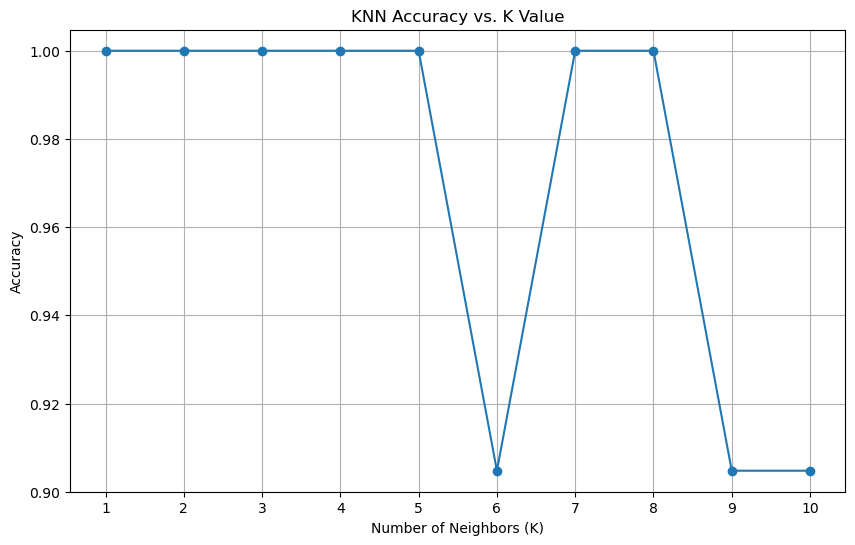


Optimal K based on accuracy: 1


In [6]:
# Find an optimal K
accuracy_scores = []
k_values = range(1, 11) # Trying K from 1 to 10

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean') # Using Euclidean distance
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('KNN Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

optimal_k = k_values[np.argmax(accuracy_scores)]
print(f"\nOptimal K based on accuracy: {optimal_k}")

In [7]:
# Train KNN with optimal K
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
knn_optimal.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.


Classifier Performance with K=1:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


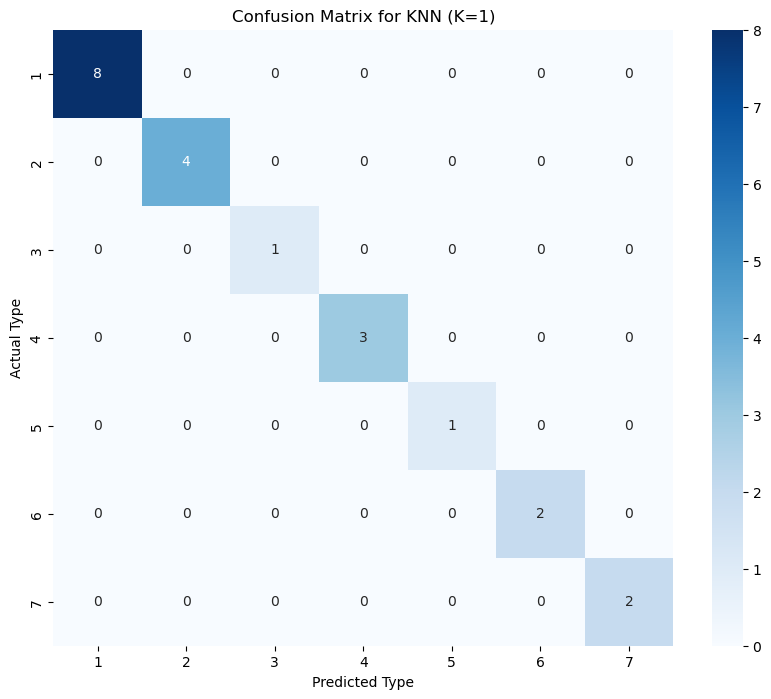

In [8]:
# Make predictions on the test set
y_pred_optimal = knn_optimal.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred_optimal)
precision = precision_score(y_test, y_pred_optimal, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_optimal, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred_optimal, average='weighted', zero_division=0)

print(f"\nClassifier Performance with K={optimal_k}:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_optimal)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=knn_optimal.classes_, yticklabels=knn_optimal.classes_)
plt.title(f'Confusion Matrix for KNN (K={optimal_k})')
plt.xlabel('Predicted Type')
plt.ylabel('Actual Type')
plt.show()

7. Visualize the decision boundaries of the classifier.

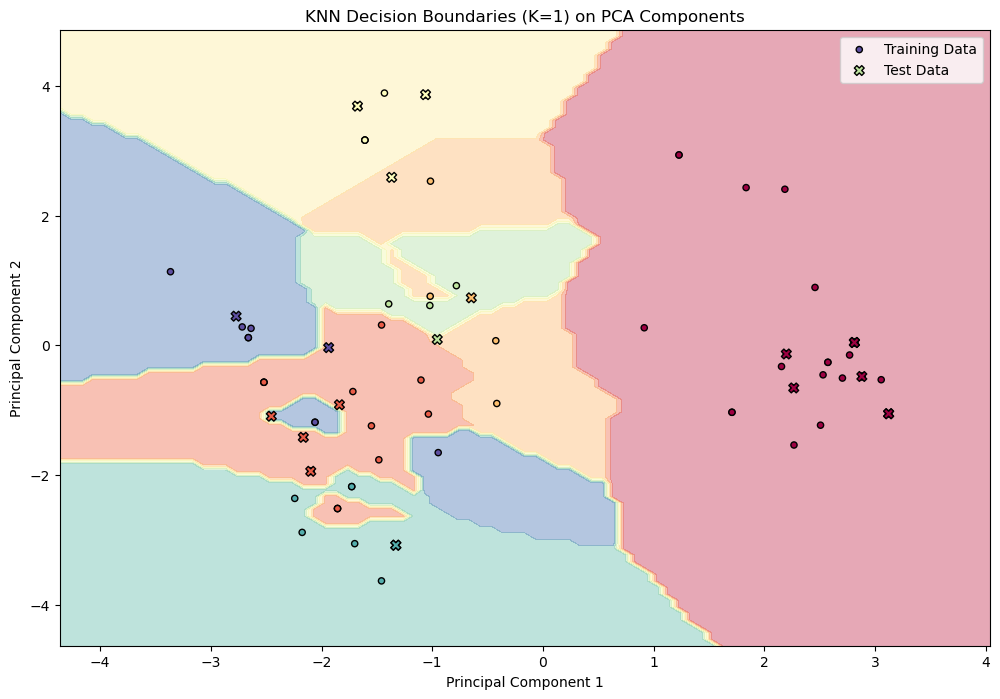

In [9]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions using PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a new KNN model on the 2 PCA components for visualization
knn_pca = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
knn_pca.fit(X_train_pca, y_train)

# Create a meshgrid to plot decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on the meshgrid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Spectral)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=20, edgecolor='k', cmap=plt.cm.Spectral, label='Training Data')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, s=50, marker='X', edgecolor='k', cmap=plt.cm.Spectral, label='Test Data')
plt.title(f'KNN Decision Boundaries (K={optimal_k}) on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Interview Questions:
**1. What are the key hyperparameters in KNN?**

The key hyperparameters in K-Nearest Neighbors (KNN) are:
n_neighbors (K): This is the most critical hyperparameter. It determines the number of nearest data points (neighbors) to consider when classifying a new data point.
A small K (e.g., K=1) makes the model highly sensitive to noise in the data and can lead to overfitting.
A large K makes the model smoother and less sensitive to individual noisy points, potentially leading to underfitting if K is too large and encompasses too many different classes.
The optimal K is usually found through techniques like cross-validation or by evaluating performance across a range of K values, as we did above.
weights: This hyperparameter determines how the vote of the neighbors is weighted.
uniform (default): All points in the neighborhood are weighted equally.
distance: Points closer to the query point have a greater influence than points further away. This can sometimes improve performance, especially if there's noise or if the classes are not perfectly separable.
You can also pass a custom function to define your own weighting scheme.
metric: This defines the distance function used to measure the similarity (or dissimilarity) between data points.
euclidean (default, p=2 for Minkowski): The most common distance metric, representing the straight-line distance between two points. Suitable for continuous numerical data.
manhattan (also known as City Block or L1 distance, p=1 for Minkowski): Calculates the sum of the absolute differences between the coordinates of the points. Often preferred when dealing with high-dimensional data or when the features are not truly independent.
minkowski: A generalized distance metric that includes Euclidean and Manhattan as special cases. It requires a p parameter. p=1 for Manhattan, p=2 for Euclidean.
chebyshev: Measures the maximum absolute difference between any two dimensions.
hamming: Suitable for binary or categorical data, measuring the number of positions at which the corresponding values are different.
cosine: Measures the cosine of the angle between two vectors, often used in text analysis or when the magnitude of the vectors doesn't matter, only their orientation.
algorithm: This parameter determines the algorithm used to compute the nearest neighbors. Different algorithms are more efficient for different dataset sizes and dimensionalities.
auto (default): Attempts to decide the most appropriate algorithm based on the values passed to fit().
ball_tree: Useful for high-dimensional data.
kd_tree: Efficient for low-dimensional data.
brute: A brute-force search that calculates all distances. It's simple but computationally expensive for large datasets.
leaf_size: Relevant for ball_tree and kd_tree algorithms, influencing the tree construction and query speed.


**2. What distance metrics can be used in KNN?**

As mentioned above, various distance metrics can be used in KNN, each suitable for different types of data and problem contexts. The most common ones include:
Euclidean Distance (L2 Norm):
Formula: $ \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} $
Description: The straight-line distance between two points in Euclidean space. It's the most widely used metric.
Best for: Continuous numerical data where the physical distance between points is meaningful.
Sensitivity: Can be sensitive to differences in scale between features, hence the importance of scaling data.
Manhattan Distance (L1 Norm / City Block Distance):
Formula: $ \sum_{i=1}^{n} |x_i - y_i| $
Description: The sum of the absolute differences of their Cartesian coordinates. Imagine navigating a city grid, moving only horizontally or vertically.
Best for: High-dimensional data, or when you want to minimize the effect of large single-dimension outliers. It's less sensitive to individual noisy dimensions than Euclidean.
Minkowski Distance:
Formula: $ \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{1/p} $
Description: A generalization of Euclidean and Manhattan distances.
Parameters: Requires a parameter p.
If p=1, it becomes Manhattan distance.
If p=2, it becomes Euclidean distance.
If p \to \infty, it approaches Chebyshev distance.
Best for: When you want to experiment with p to find the best fit for your data.
Chebyshev Distance (L-infinity Norm):
Formula: $ \max_{i=1}^{n} |x_i - y_i| $
Description: The maximum absolute difference between any two corresponding dimensions of the points.
Best for: Scenarios where the largest difference along any single dimension is most important.
Hamming Distance:
Formula: Number of positions at which the corresponding bits are different.
Description: Counts the number of differing attributes between two binary vectors (or categorical data after one-hot encoding).
Best for: Binary or categorical data. For example, comparing two strings of equal length or genetic sequences.
Cosine Distance:
Formula: $ 1 - \frac{\sum_{i=1}^{n} (x_i y_i)}{\sqrt{\sum_{i=1}^{n} x_i^2} \sqrt{\sum_{i=1}^{n} y_i^2}} $
Description: Measures the angle between two vectors. A smaller angle (closer to 0) means higher similarity. Cosine similarity is more common ($ \cos(\theta) $). Cosine distance is 
.
Best for: Text analysis, recommender systems, or when the magnitude of the feature vectors is less important than their orientation. Often used when data points are high-dimensional and sparse.